# Autoencoders using neural networks provided by Keras

Autoencoding is a data compression algorithm where the compression and decompression functions are:
- data-specific
- lossy
- learned automatically from examples

Source for inspiration:
- https://blog.keras.io/building-autoencoders-in-keras.html

In [77]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

In [78]:
# Load MNIST hand-written digit images. Ignore targets.
(X_train, _), (X_test, _) = mnist.load_data()

In [79]:
# normalize MNIST images to be used by autoencoder NN with convolution layers
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 28, 28, 1))
X_test = np.reshape(X_test, (len(X_test), 28, 28, 1))

# Create noisy MNIST images - apply a gaussian noise matrix and clip the images between 0 and 1.
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape) 
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape) 
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('X_train_noisy:', X_train_noisy.shape)
print('X_test_noisy:', X_test_noisy.shape)

X_train: (60000, 28, 28, 1)
X_test: (10000, 28, 28, 1)
X_train_noisy: (60000, 28, 28, 1)
X_test_noisy: (10000, 28, 28, 1)


In [82]:
def show_images(X, n):
    """
    Show first n images from the X array.
    """
    plt.figure(figsize=(10, 2))
    for i in range(1, n + 1):
        ax = plt.subplot(1, n, i)
        plt.imshow(X[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

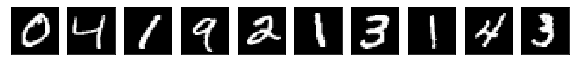

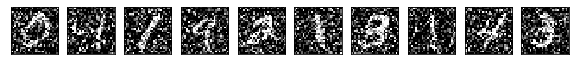

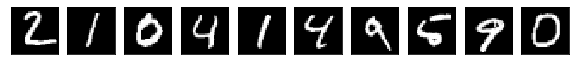

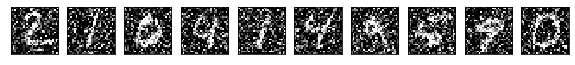

In [83]:
show_images(X_train, 10)
show_images(X_train_noisy, 10)
show_images(X_test, 10)
show_images(X_test_noisy, 10)

In [87]:
# Keras (from TensorFlow) imports for the dataset and building NN
from tensorflow.keras.layers import Input, UpSampling2D, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [96]:
autoencoder.fit(X_train_noisy,
                X_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(X_test_noisy, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 225s 4ms/sample - loss: 0.5939 - val_loss: 0.5470
Epoch 2/20
60000/60000 [==============================] - 249s 4ms/sample - loss: 0.5143 - val_loss: 0.5019
Epoch 3/20
60000/60000 [==============================] - 150s 2ms/sample - loss: 0.4930 - val_loss: 0.4915
Epoch 4/20
60000/60000 [==============================] - 160s 3ms/sample - loss: 0.4831 - val_loss: 0.4818
Epoch 5/20
60000/60000 [==============================] - 155s 3ms/sample - loss: 0.4733 - val_loss: 0.4716
Epoch 6/20
60000/60000 [==============================] - 179s 3ms/sample - loss: 0.4628 - val_loss: 0.4605
Epoch 7/20
60000/60000 [==============================] - 158s 3ms/sample - loss: 0.4513 - val_loss: 0.4481
Epoch 8/20
60000/60000 [==============================] - 154s 3ms/sample - loss: 0.4385 - val_loss: 0.4346
Epoch 9/20
60000/60000 [==============================] - 153s 3ms/sample - loss: 0.42

In [97]:
decoded_imgs = autoencoder.predict(X_test)

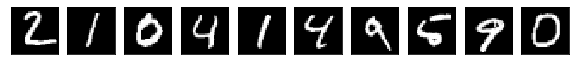

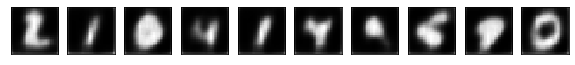

In [98]:
show_images(X_test, 10)
show_images(decoded_imgs, 10)

In [104]:
# reshape data to be used by autoencoder NN - fully-connected layers
X_train2 = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test2 = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_train_noisy2 = X_train_noisy.reshape((len(X_train_noisy), np.prod(X_train_noisy.shape[1:])))
X_test_noisy2 = X_test_noisy.reshape((len(X_test_noisy), np.prod(X_test_noisy.shape[1:])))

print ('X_train2.shape:', X_train2.shape)
print ('X_test2.shape:', X_test2.shape)
print ('X_train_noisy2.shape:', X_train_noisy2.shape)
print ('X_test_noisy2.shape:', X_test_noisy2.shape)

X_train2.shape: (60000, 784)
X_test2.shape: (10000, 784)
X_train_noisy2.shape: (60000, 784)
X_test_noisy2.shape: (10000, 784)


In [118]:
# Create simple autoencoder/decoder
from tensorflow.keras.layers import Dense

input_img2 = Input(shape=(784,))
encoded2 = Dense(128, activation='sigmoid')(input_img2)
encoded2 = Dense(64, activation='sigmoid')(encoded2)
encoded2 = Dense(32, activation='sigmoid')(encoded2)

decoded2 = Dense(64, activation='sigmoid')(encoded2)
decoded2 = Dense(128, activation='sigmoid')(decoded2)
decoded2 = Dense(784, activation='sigmoid')(decoded2)

autoencoder2 = Model(input_img2, decoded2)
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')

In [124]:
# use e.g. 100 epochs
epochs=10
autoencoder2.fit(X_train_noisy2,
                 X_train2,
                 epochs=epochs,
                 batch_size=256,
                 shuffle=True,
                 validation_data=(X_test_noisy2, X_test2))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1602 - val_loss: 0.1645
Epoch 2/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1596 - val_loss: 0.1640
Epoch 3/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1590 - val_loss: 0.1632
Epoch 4/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.1584 - val_loss: 0.1630
Epoch 5/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1576 - val_loss: 0.1620
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1569 - val_loss: 0.1613
Epoch 7/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1562 - val_loss: 0.1609
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1556 - val_loss: 0.1599
Epoch 9/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.1548 - val_

In [125]:
# make prediction - decode numbers using test set
decoded_imgs2 = autoencoder2.predict(X_test2)

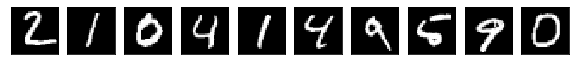

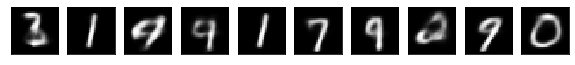

In [126]:
show_images(X_test2, 10)
show_images(decoded_imgs2, 10)

In [127]:
# make prediction - decode numbers using noisy test set
decoded_imgs2_noisy = autoencoder2.predict(X_test_noisy2)

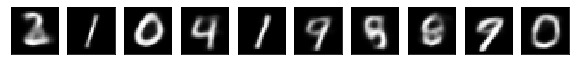

In [129]:
show_images(decoded_imgs2_noisy, 10)